# **Chapter 7**
_Replicate at least 3_

## **Gradient Descent**

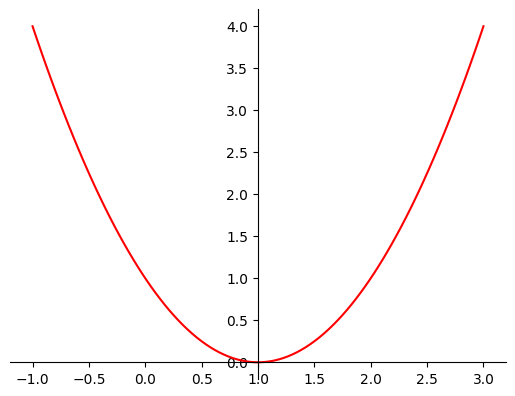

Number of iterations =  1 
Actual value of x  is =  2.96
Number of iterations =  2 
Actual value of x  is =  2.9208
Number of iterations =  3 
Actual value of x  is =  2.882384
Number of iterations =  4 
Actual value of x  is =  2.84473632
Number of iterations =  5 
Actual value of x  is =  2.8078415936
Number of iterations =  6 
Actual value of x  is =  2.7716847617280003
Number of iterations =  7 
Actual value of x  is =  2.7362510664934403
Number of iterations =  8 
Actual value of x  is =  2.7015260451635714
Number of iterations =  9 
Actual value of x  is =  2.6674955242603
Number of iterations =  10 
Actual value of x  is =  2.6341456137750936
Number of iterations =  11 
Actual value of x  is =  2.601462701499592
Number of iterations =  12 
Actual value of x  is =  2.5694334474696
Number of iterations =  13 
Actual value of x  is =  2.538044778520208
Number of iterations =  14 
Actual value of x  is =  2.507283882949804
Number of iterations =  15 
Actual value of x  is =  2.47713

In [1]:
#Import important libraries
import numpy as np
import matplotlib.pyplot as plt

#Define Function
x = np.linspace(-1, 3, 100)
y = x**2-2*x+1

#Display in Graph
fig = plt.figure()
axdef = fig.add_subplot(1, 1, 1)
axdef.spines['left'].set_position('center')
axdef.spines['bottom'].set_position('zero')
axdef.spines['right'].set_color('none')
axdef.spines['top'].set_color('none')
axdef.xaxis.set_ticks_position('bottom')
axdef.yaxis.set_ticks_position('left')
plt.plot(x,y, 'r')
plt.show()

#Define gradiant function
Gradf = lambda x: 2*x-2

#Initial Set of Variables
actual_X  = 3 
learning_rate  = 0.01 
precision_value = 0.000001 
previous_step_size = 1 
max_iteration = 10000 
iteration_counter = 0 

#Iteration Procedure
while previous_step_size  > precision_value  and iteration_counter  < max_iteration : 
    PreviousX = actual_X 
    actual_X  = actual_X  - learning_rate  * Gradf(PreviousX) 
    previous_step_size  = abs(actual_X  - PreviousX) 
    iteration_counter  = iteration_counter +1 
    print("Number of iterations = ",iteration_counter ,"\nActual value of x  is = ",actual_X )

#Print Final Results
print("X value of f(x) minimum = ", actual_X )

## **Newton Raphson**

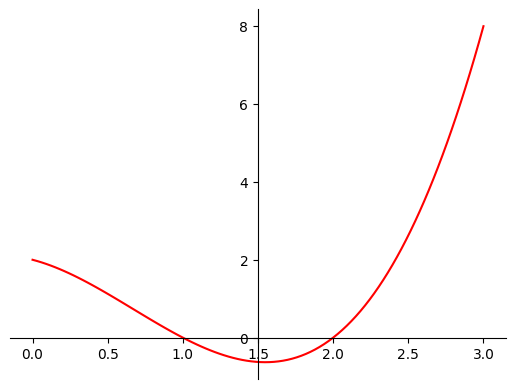

Value of x at the minimum of the function 1.5454545454545454
Number of iterations =  1 
Actual value of x  is =  2.0
Number of iterations =  2 
Actual value of x  is =  1.625
Number of iterations =  3 
Actual value of x  is =  1.5516304347826086
Number of iterations =  4 
Actual value of x  is =  1.5485890147300967
Number of iterations =  5 
Actual value of x  is =  1.5485837703704566
Number of iterations =  6 
Actual value of x  is =  1.5485837703548635
X value of f(x) minimum =  1.5485837703548635


In [2]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

#Define Functions
x = np.linspace(0,3,100)
y=x**3 -2*x**2 -x + 2

#Display Graph
fig = plt.figure()
axdef = fig.add_subplot(1, 1, 1)
axdef.spines['left'].set_position('center')
axdef.spines['bottom'].set_position('zero')
axdef.spines['right'].set_color('none')
axdef.spines['top'].set_color('none')
axdef.xaxis.set_ticks_position('bottom')
axdef.yaxis.set_ticks_position('left')
plt.plot(x,y, 'r')
plt.show()
print('Value of x at the minimum of the function', x[np.argmin(y)])

#Define First and Second Derivative
FirstDerivative = lambda x: 3*x**2-4*x -1 
SecondDerivative = lambda x: 6*x-4  

#Initial Parameters 
ActualX = 3 
PrecisionValue = 0.000001 
PreviousStepSize = 1 
MaxIteration = 10000 
IterationCounter = 0 

#Newton-Raphson Method
while PreviousStepSize > PrecisionValue and IterationCounter < MaxIteration:
    PreviousX = ActualX
    ActualX = ActualX - FirstDerivative(PreviousX)/ SecondDerivative(PreviousX)
    PreviousStepSize = abs(ActualX - PreviousX) 
    IterationCounter = IterationCounter+1 
    print("Number of iterations = ",IterationCounter,"\nActual value of x  is = ",ActualX) 

#Print Result
print("X value of f(x) minimum = ", ActualX)

## **Gaussian Mistures**

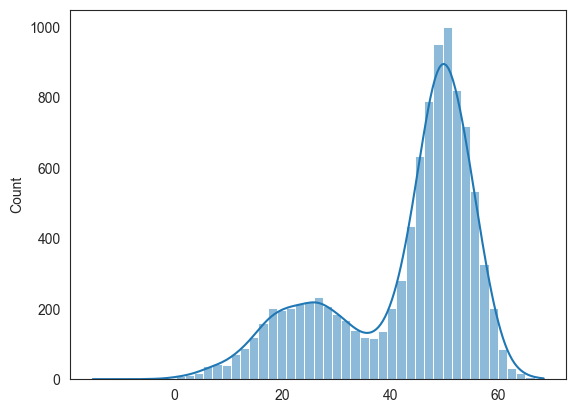

Initial distribution means = (25, 50)
Initial distribution standard deviation = (9, 5)
GM_model distribution means = [[24.14459539]
 [49.9621133 ]]
GM_model distribution standard deviation = [[[8.59827167]]

 [[5.03213425]]]


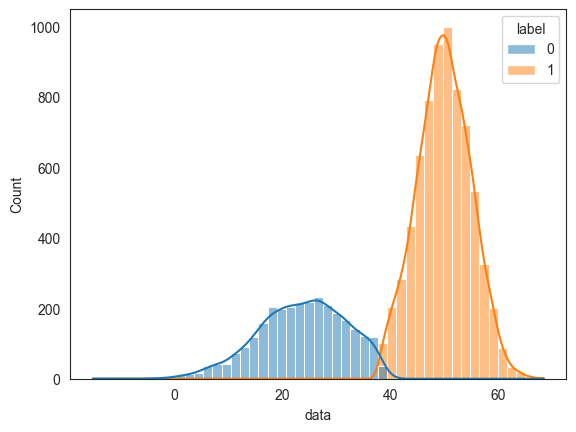

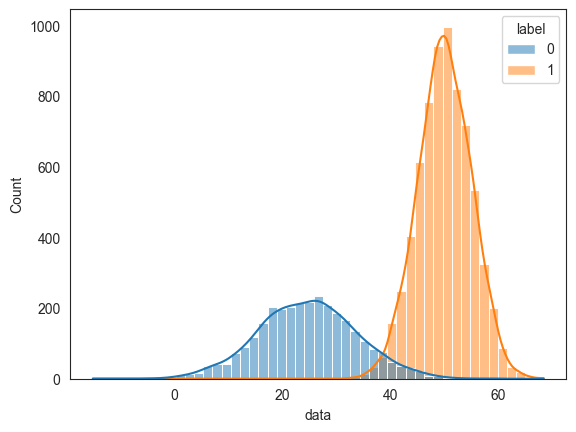

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd

mean_1=25
st_1=9
mean_2=50
st_2=5

n_dist_1 = np.random.normal(loc=mean_1, scale=st_1, size=3000)
n_dist_2 = np.random.normal(loc=mean_2, scale=st_2, size=7000)

dist_merged = np.hstack((n_dist_1, n_dist_2))

sns.set_style("white")
sns.histplot(data=dist_merged, kde=True)
plt.show()

dist_merged_res = dist_merged.reshape((len(dist_merged), 1))
gm_model = GaussianMixture(n_components=2, init_params='kmeans')
gm_model.fit(dist_merged_res)

print(f"Initial distribution means = {mean_1,mean_2}")
print(f"Initial distribution standard deviation = {st_1,st_2}")

print(f"GM_model distribution means = {gm_model.means_}")
print(f"GM_model distribution standard deviation = {np.sqrt(gm_model.covariances_)}")

dist_labels = gm_model.predict(dist_merged_res)

sns.set_style("white")
data_pred=pd.DataFrame({'data':dist_merged, 'label':dist_labels})
sns.histplot(data = data_pred, x = "data", kde = True, hue = "label")
plt.show()

label_0 = np.zeros(3000, dtype=int)
label_1 = np.ones(7000, dtype=int)
labels_merged = np.hstack((label_0, label_1))
data_init=pd.DataFrame({'data':dist_merged, 'label':labels_merged})

sns.set_style("white")
sns.histplot(data = data_init, x = "data", kde = True, hue = "label")
plt.show()

## **Simulated Annealing**

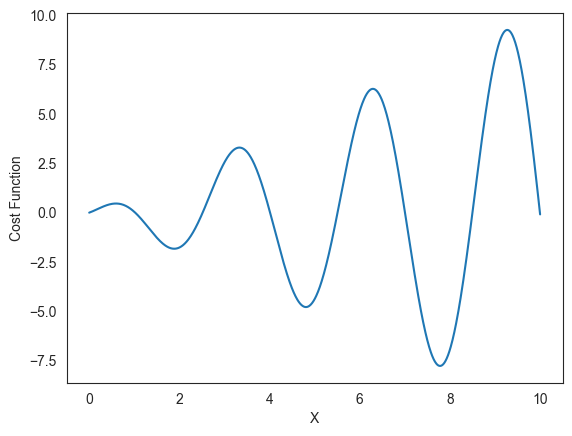

Iteration =  0 x_min =  8.352060345432603 Global Minimum = -2.549691087509061 Acceptance Probability = 1
Iteration =  1 x_min =  8.268146731695177 Global Minimum = -3.865265080181498 Acceptance Probability = 1.0011720530797679
Iteration =  2 x_min =  8.077074224781931 Global Minimum = -6.264757086553908 Acceptance Probability = 1.0013164397397474
Iteration =  4 x_min =  8.072960126990173 Global Minimum = -6.3053561226675905 Acceptance Probability = 0.9993874938212183
Iteration =  14 x_min =  8.057426141282635 Global Minimum = -6.45398523520768 Acceptance Probability = 1.0011249991583007
Iteration =  17 x_min =  7.908942504770391 Global Minimum = -7.482144101692382 Acceptance Probability = 0.9960707945643333
Iteration =  18 x_min =  7.805571271239743 Global Minimum = -7.755842336539771 Acceptance Probability = 1.0092963751415767
Iteration =  21 x_min =  7.767739570791674 Global Minimum = -7.763382995462104 Acceptance Probability = 1.0072493114830527
Iteration =  27 x_min =  7.7939618593

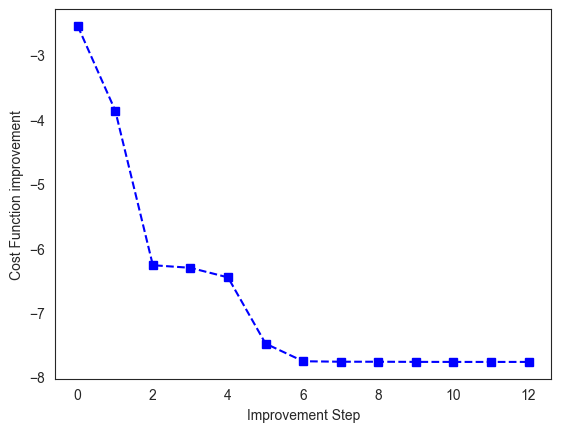

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(0,10,1000)


def cost_function(x):
    return x*np.sin(2.1*x+1)

plt.plot(x,cost_function(x))
plt.xlabel('X')
plt.ylabel('Cost Function')
plt.show()

temp = 2000
iter = 2000
step_size = 0.1
np.random.seed(15)
xi = np.random.uniform(min(x), max(x))
E_xi = cost_function(xi)
xit, E_xit = xi, E_xi
cost_func_eval = []
acc_prob = 1

for i in range(iter):
        xstep = xit + np.random.randn() * step_size  
        E_step = cost_function(xstep)
        if E_step < E_xi:
            xi, E_xi = xstep, E_step
            cost_func_eval.append(E_xi)
            print('Iteration = ',i, 'x_min = ',xi,'Global Minimum =', E_xi,
                                     'Acceptance Probability =', acc_prob)
        diff_energy = E_step - E_xit
        t = temp /(i + 1)
        acc_prob = np.exp(-diff_energy/ t)
        if diff_energy < 0 or np.random.randn() < acc_prob:
            xit, E_xit = xstep, E_step


plt.plot(cost_func_eval, 'bs--')
plt.xlabel('Improvement Step')
plt.ylabel('Cost Function improvement')
plt.show()


## **Scipy Optimize**

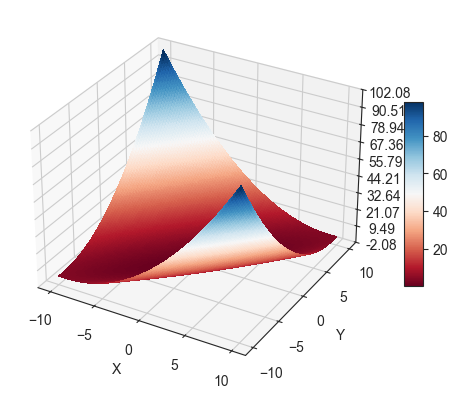

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 77
         Function evaluations: 147
[3.17941614e-09 3.64600127e-09]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 59
[-6.66133815e-14 -1.32338585e-13]


In [5]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

def matyas(x):
   return 0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1]

#def booth(x):
#   return (x[0]+2*x[1]-7)**2+(2*x[0]+x[1]-5)**2

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
x, y = np.meshgrid(x, y)
z = matyas([x,y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # use add_subplot instead of gca
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, 
                      cmap=cm.RdBu, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

x0 = np.array([-10, 10])
NelderMeadOptimizeResults = minimize(matyas, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

print(NelderMeadOptimizeResults.x)

x0 = np.array([-10, 10])
PowellOptimizeResults = minimize(matyas, x0, method='Powell',
               options={'xtol': 1e-8, 'disp': True})

print(PowellOptimizeResults.x)

# **Chapter 8**
_replicate at least 2_

## **Genetic Algorithm**

In [6]:
import numpy as np

var_values = [1,-3,4.5,2]
num_coeff = 4
pop_chrom = 10 
sel_rate = 5

pop_size = (pop_chrom,num_coeff) 
pop_new = np.random.uniform(low=-10.0, high=10.0, size=pop_size)
print(pop_new)

num_gen = 100
for k in range(num_gen):
    fitness = np.sum(pop_new *var_values, axis=1)
    par_sel = np.empty((sel_rate, pop_new.shape[1]))
    print("Current generation = ", k)
    print("Best fitness value : ", np.max(fitness))
    
    for i in range(sel_rate):
        sel_id = np.where(fitness == np.max(fitness))
        sel_id = sel_id[0][0]
        par_sel[i, :] = pop_new[sel_id, :]
        fitness[sel_id]=np.min(fitness)

    offspring_size=(pop_chrom-sel_rate, num_coeff)
    offspring = np.empty(offspring_size)
    crossover_lenght = int(offspring_size[1]/2)
    
    for j in range(offspring_size[0]):
        par1_id = np.random.randint(0,par_sel.shape[0])
        par2_id = np.random.randint(0,par_sel.shape[0])
        offspring[j, 0:crossover_lenght] = par_sel[par1_id, 0:crossover_lenght]
        offspring[j, crossover_lenght:] = par_sel[par2_id, crossover_lenght:]
    
    for m in range(offspring.shape[0]):
        mut_val = np.random.uniform(-1.0, 1.0)
        mut_id = np.random.randint(0,par_sel.shape[1])
        offspring[m, mut_id] = offspring[m, mut_id] + mut_val 

    pop_new[0:par_sel.shape[0], :] = par_sel
    pop_new[par_sel.shape[0]:, :] = offspring

fitness = np.sum(pop_new *var_values, axis=1)
best_id = np.where(fitness == np.max(fitness))
print("Optimized coefficient values = ", pop_new[best_id, :])
print("Maximum value of y = ", fitness[best_id])

[[-1.506283    0.97858584  7.06857349 -4.08190855]
 [ 6.91832375 -6.82362722  1.52599377 -4.08613855]
 [-2.70798314 -4.34150591 -0.14547788  0.32515259]
 [ 2.71928451  1.29830134 -4.20873011 -5.38754178]
 [ 2.67848691  9.05920466  2.57541758  1.29011385]
 [-8.81594363  0.35951515  1.87607787 -7.20626053]
 [-6.58817076  5.78025388  3.36723947  9.81028809]
 [ 2.72171445  3.45862503  4.83909797 -0.7329152 ]
 [-0.86960725 -6.12460608  8.86070373 -2.37813224]
 [-4.86558367 -6.689861   -6.88012977  7.47397024]]
Current generation =  0
Best fitness value :  52.62111326168417
Current generation =  1
Best fitness value :  52.62111326168417
Current generation =  2
Best fitness value :  61.985966034781434
Current generation =  3
Best fitness value :  61.985966034781434
Current generation =  4
Best fitness value :  62.6486435913117
Current generation =  5
Best fitness value :  64.4848782767121
Current generation =  6
Best fitness value :  64.4848782767121
Current generation =  7
Best fitness value

## **Symbolic Regression**
_Note: must install library scikit-learn below version 1.7 to work._

_Due to scikit-learn internal method \_validate\_data no longer exist in 1.7_

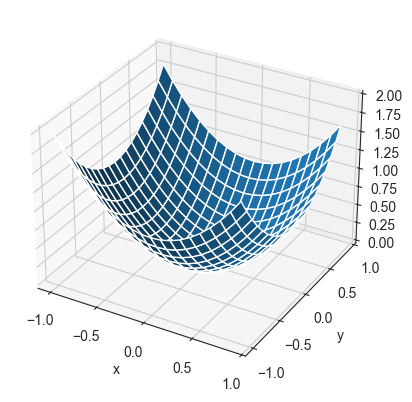

C:\Users\Zuzu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    36.62           1.2059        7         0.273911         0.277976      8.24s
   1     9.67         0.653883       11        0.0568042        0.0635825      5.44s
   2     6.99         0.480429        7                0                0      3.89s
add(mul(X1, X1), mul(X0, X0))
R2: 1.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gplearn.genetic import SymbolicRegressor

x = np.arange(-1, 1, 1/10.)
y = np.arange(-1, 1, 1/10.)
x, y = np.meshgrid(x, y)
f_values = x**2 + y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Modified line for 3D axis initialization
ax.plot_surface(x, y, f_values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


input_train = np.random.uniform(-1, 1, (100, 2)).astype(np.float64)
output_train = (input_train[:, 0]**2 + input_train[:, 1]**2).astype(np.float64)

input_test = np.random.uniform(-1, 1, (100, 2)).astype(np.float64)
output_test = (input_test[:, 0]**2 + input_test[:, 1]**2).astype(np.float64)

function_set = ['add', 'sub', 'mul']

sr_model = SymbolicRegressor(
    population_size=1000,
    function_set=function_set,
    generations=10,
    stopping_criteria=0.001,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.01,
    random_state=1
)

sr_model.fit(input_train, output_train)


print(sr_model._program)
print('R2:',sr_model.score(input_test,output_test))

## **Cellular Automata**

Binary rule is: [0 1 1 1 1 1 1 0]


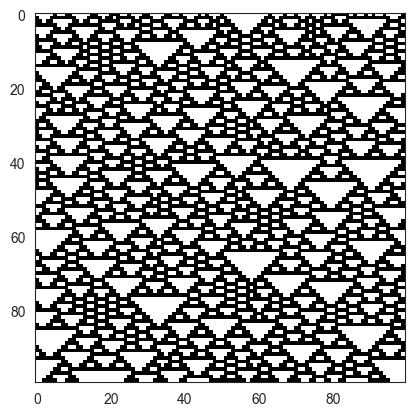

In [8]:
import numpy as np
import matplotlib.pyplot as plt

cols_num=100
rows_num=100
wolfram_rule=126
bin_rule = np.array([int(_) for _ in np.binary_repr(wolfram_rule, 8)])
print('Binary rule is:',bin_rule)

cell_state = np.zeros((rows_num, cols_num),dtype=np.int8)
cell_state[0, :] = np.random.randint(0,2,cols_num)

update_window= np.array([[4], [2], [1]])
for j in range(rows_num - 1):
    update = np.vstack((np.roll(cell_state[j, :], 1), cell_state[j, :],
                   np.roll(cell_state[j, :], -1))).astype(np.int8)
    rule_up = np.sum(update * update_window, axis=0).astype(np.int8)
    cell_state[j + 1, :] = bin_rule[7 - rule_up]
        

ca_img= plt.imshow(cell_state,cmap=plt.cm.binary)
plt.show()

# **Chapter 9**
Replicate at least 2

## **Standard Brownian Motion**
_Note: replaced np.math.sqrt(n) to np.sqrt(n) for optimization_ 

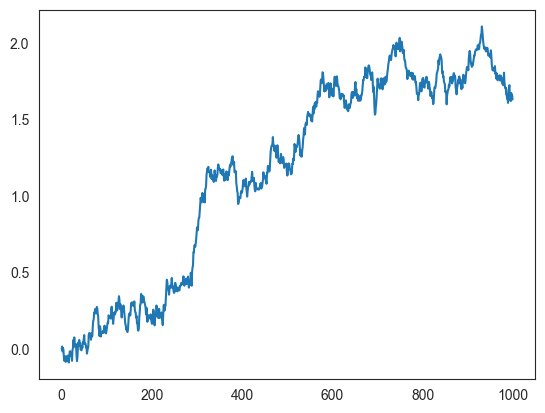

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)

n = 1000

sqn = 1/(np.sqrt(n))

z_values = np.random.randn(n)

Yk = 0

sb_motion=list()

for k in range(n):
    Yk = Yk + sqn*z_values[k]
    sb_motion.append(Yk)

plt.plot(sb_motion)
plt.show()

## **Amazon Stock Monte Carlo Simulation**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2012-10-03 to 2022-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2515 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB
None
              Close
Date               
2012-10-03  12.7960
2012-10-04  13.0235
2012-10-05  12.9255
2012-10-08  12.9530
2012-10-09  12.5480
                 Close
Date                  
2022-09-26  115.150002
2022-09-27  114.410004
2022-09-28  118.010002
2022-09-29  114.800003
2022-09-30  113.000000
             Close
count  2515.000000
mean     71.683993
std      53.944668
min      11.030000
25%      19.921750
50%      50.187000
75%     104.449249
max     186.570496


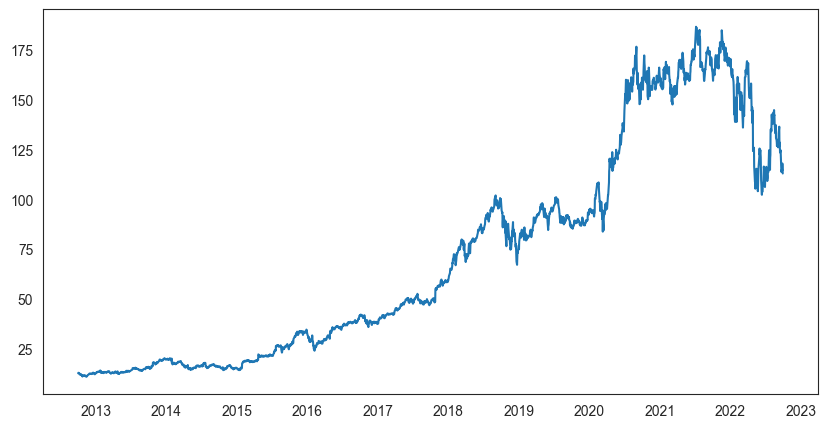

               Close
Date                
2022-09-19  0.009106
2022-09-20 -0.020013
2022-09-21 -0.030327
2022-09-22 -0.010430
2022-09-23 -0.030553
2022-09-26  0.011969
2022-09-27 -0.006447
2022-09-28  0.030981
2022-09-29 -0.027578
2022-09-30 -0.015804


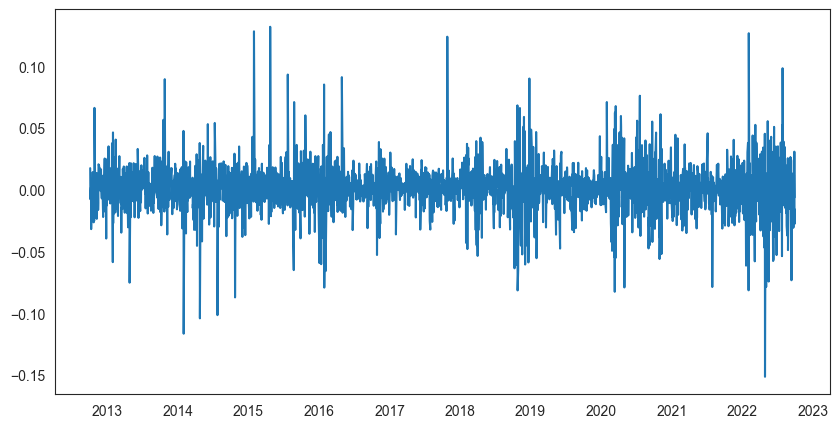

Drift =  [0.0006643]


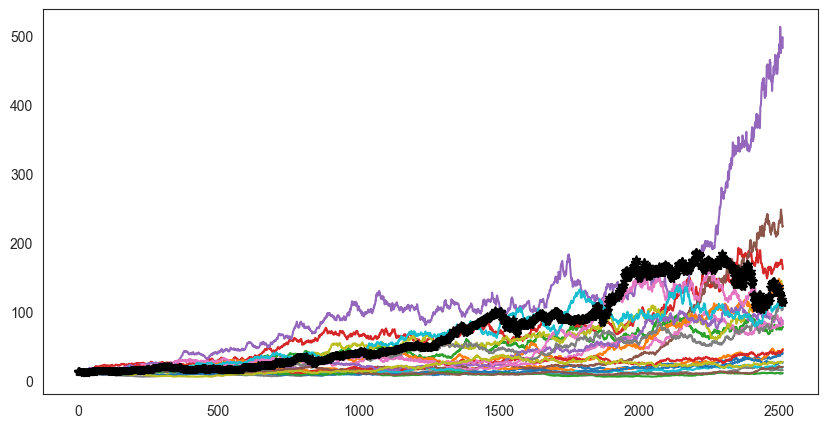

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

AmznData = pd.read_csv('AMZN.csv',header=0, usecols=['Date', 'Close'],parse_dates=True,index_col='Date')
print(AmznData.info())
print(AmznData.head())
print(AmznData.tail())
print(AmznData.describe())

plt.figure(figsize=(10,5))
plt.plot(AmznData)
plt.show()

AmznDataPctChange = AmznData.pct_change()
AmznLogReturns = np.log(1 + AmznDataPctChange) 
print(AmznLogReturns.tail(10))

plt.figure(figsize=(10,5))
plt.plot(AmznLogReturns)
plt.show()

MeanLogReturns = np.array(AmznLogReturns.mean())
VarLogReturns = np.array(AmznLogReturns.var()) 
StdevLogReturns = np.array(AmznLogReturns.std()) 

Drift = MeanLogReturns - (0.5 * VarLogReturns)
print("Drift = ",Drift)

NumIntervals = 2515
Iterations = 20
np.random.seed(7)
SBMotion = norm.ppf(np.random.rand(NumIntervals, Iterations))

DailyReturns = np.exp(Drift + StdevLogReturns * SBMotion)

StartStockPrices = AmznData.iloc[0]
StockPrice = np.zeros_like(DailyReturns)
StockPrice[0] = StartStockPrices
for t in range(1, NumIntervals):

    StockPrice[t] = StockPrice[t - 1] * DailyReturns[t]

plt.figure(figsize=(10,5))
plt.plot(StockPrice)   

AMZNTrend = np.array(AmznData.iloc[:, 0:1])

plt.plot(AMZNTrend,'k*')   
plt.show()

# **Chapter 10**
*Replicate only 1*

## **Airfoil Selt Noise**

    Frequency  AngleAttack  ChordLength  FSVelox      SSDT      SSP
0         800          0.0       0.3048     71.3  0.002663  126.201
1        1000          0.0       0.3048     71.3  0.002663  125.201
2        1250          0.0       0.3048     71.3  0.002663  125.951
3        1600          0.0       0.3048     71.3  0.002663  127.591
4        2000          0.0       0.3048     71.3  0.002663  127.461
5        2500          0.0       0.3048     71.3  0.002663  125.571
6        3150          0.0       0.3048     71.3  0.002663  125.201
7        4000          0.0       0.3048     71.3  0.002663  123.061
8        5000          0.0       0.3048     71.3  0.002663  121.301
9        6300          0.0       0.3048     71.3  0.002663  119.541
10       8000          0.0       0.3048     71.3  0.002663  117.151
11      10000          0.0       0.3048     71.3  0.002663  115.391
12      12500          0.0       0.3048     71.3  0.002663  112.241
13      16000          0.0       0.3048     71.3

C:\Users\Zuzu\AppData\Local\Temp\ipykernel_15504\2129041695.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ASNData = pd.read_csv('airfoil_self_noise.dat', delim_whitespace=True, names=ASNNames)


              count         mean          std         min         25%  \
Frequency    1503.0  2886.380572  3152.573137  200.000000  800.000000   
AngleAttack  1503.0     6.782302     5.918128    0.000000    2.000000   
ChordLength  1503.0     0.136548     0.093541    0.025400    0.050800   
FSVelox      1503.0    50.860745    15.572784   31.700000   39.600000   
SSDT         1503.0     0.011140     0.013150    0.000401    0.002535   
SSP          1503.0   124.835943     6.898657  103.380000  120.191000   

                     50%          75%           max  
Frequency    1600.000000  4000.000000  20000.000000  
AngleAttack     5.400000     9.900000     22.200000  
ChordLength     0.101600     0.228600      0.304800  
FSVelox        39.600000    71.300000     71.300000  
SSDT            0.004957     0.015576      0.058411  
SSP           125.721000   129.995500    140.987000  
MinMaxScaler()
              count      mean       std  min       25%       50%       75%  \
Frequency    1503

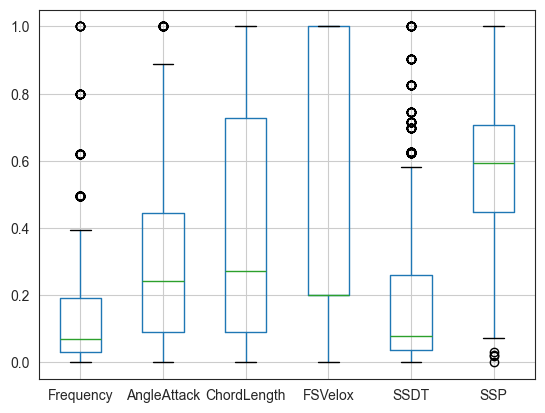

             Frequency  AngleAttack  ChordLength   FSVelox      SSDT       SSP
Frequency     1.000000    -0.272765    -0.003661  0.133664 -0.230107 -0.390711
AngleAttack  -0.272765     1.000000    -0.504868  0.058760  0.753394 -0.156108
ChordLength  -0.003661    -0.504868     1.000000  0.003787 -0.220842 -0.236162
FSVelox       0.133664     0.058760     0.003787  1.000000 -0.003974  0.125103
SSDT         -0.230107     0.753394    -0.220842 -0.003974  1.000000 -0.312670
SSP          -0.390711    -0.156108    -0.236162  0.125103 -0.312670  1.000000


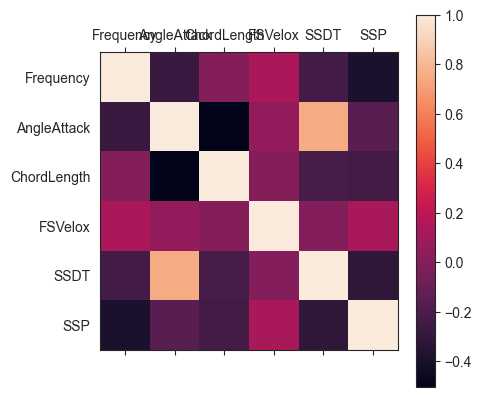

X shape =  (1503, 5)
Y shape =  (1503,)
X train shape =  (1052, 5)
X test shape =  (451, 5)
Y train shape =  (1052,)
Y test shape =  (451,)
Linear Regression Model
0.015826467113949756
SKLearn Neural Network Model
0.0029886801862497904


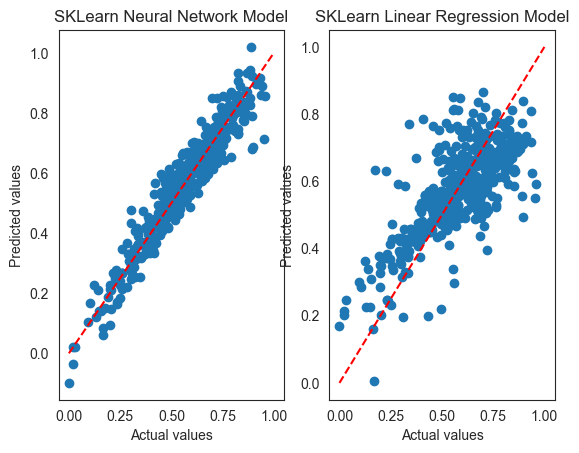

In [11]:
import pandas as pd

ASNNames= ['Frequency','AngleAttack','ChordLength','FSVelox','SSDT','SSP']

ASNData = pd.read_csv('airfoil_self_noise.dat', delim_whitespace=True, names=ASNNames)

print(ASNData.head(20))

print(ASNData.info())

BasicStats = ASNData.describe()
BasicStats = BasicStats.transpose()
print(BasicStats)


from sklearn.preprocessing import MinMaxScaler

ScalerObject = MinMaxScaler()
print(ScalerObject.fit(ASNData))
ASNDataScaled = ScalerObject.fit_transform(ASNData)
ASNDataScaled = pd.DataFrame(ASNDataScaled, columns=ASNNames)

summary = ASNDataScaled.describe()
summary = summary.transpose()
print(summary)

import matplotlib.pyplot as plt
boxplot = ASNDataScaled.boxplot(column=ASNNames)
plt.show()

CorASNData = ASNDataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorASNData.shape[1]):
    print(CorASNData)

plt.matshow(CorASNData)
plt.xticks(range(len(CorASNData.columns)), CorASNData.columns)
plt.yticks(range(len(CorASNData.columns)), CorASNData.columns)
plt.colorbar()
plt.show()


from sklearn.model_selection import train_test_split

X = ASNDataScaled.drop('SSP', axis = 1)
print('X shape = ',X.shape)
Y = ASNDataScaled['SSP']
print('Y shape = ',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ',Y_test.shape)


#Linear Regression
from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)

from sklearn.metrics import mean_squared_error

MseLM = mean_squared_error(Y_test, Y_predLM)
print('Linear Regression Model')
print(MseLM)


#MLP Regressor Model
from sklearn.neural_network import MLPRegressor

MLPRegModel = MLPRegressor(hidden_layer_sizes=(50),activation='relu', solver='lbfgs',
                                 tol=1e-4, max_iter=10000, random_state=1)

MLPRegModel.fit(X_train, Y_train)

Y_predMLPReg = MLPRegModel.predict(X_test)

MseMLP = mean_squared_error(Y_test, Y_predMLPReg)
print('SKLearn Neural Network Model')
print(MseMLP)

# Plot a comparison diagram
plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_predMLPReg)
plt.plot((0, 1), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Neural Network Model")

plt.subplot(122)
plt.scatter(Y_test, Y_predLM)
plt.plot((0, 1), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()